In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install Sequential


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install wrapt


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
audio_df = pd.read_csv('DATASET-balanced.csv')


In [52]:
label_encoder = LabelEncoder()
audio_df['LABEL'] = label_encoder.fit_transform(audio_df['LABEL'])

audio_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0


In [53]:
y = audio_df['LABEL']
X = audio_df.drop('LABEL',axis =1)

In [54]:
audio_df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,1


In [55]:
X.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20'],
      dtype='object')

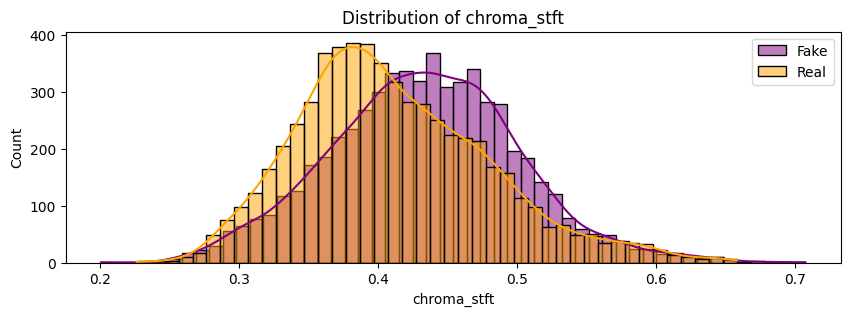

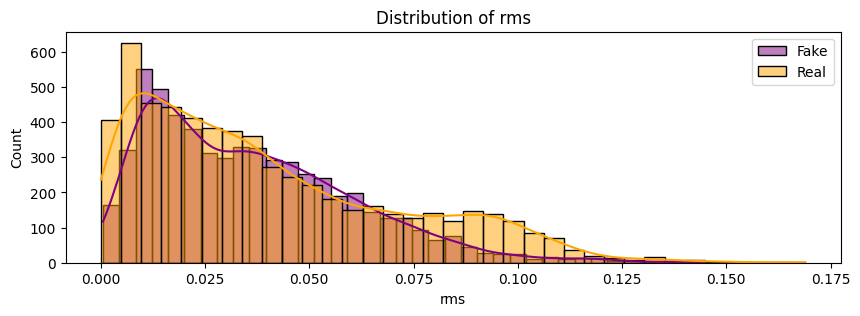

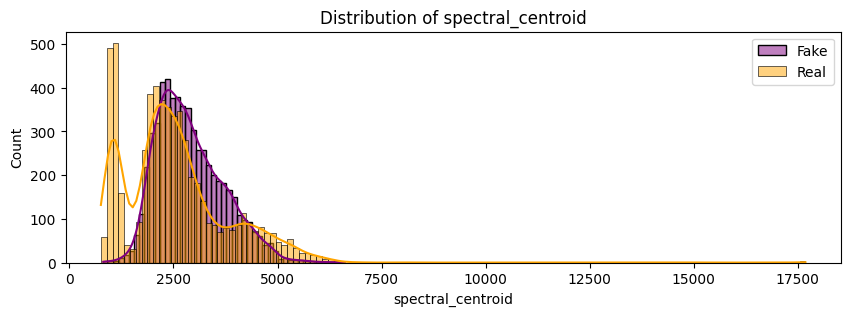

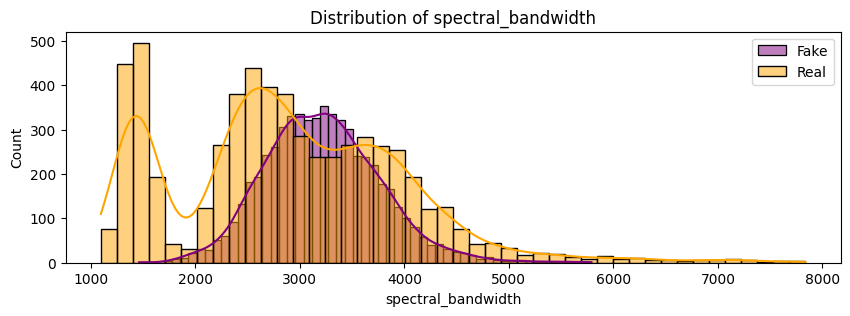

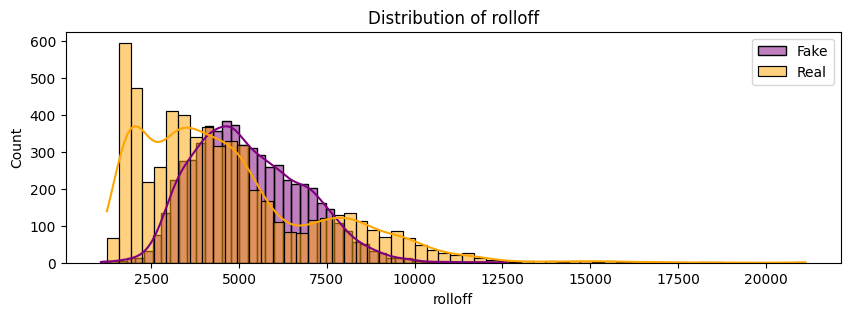

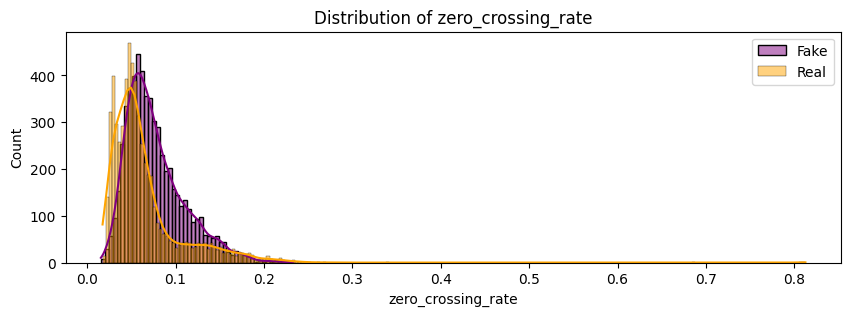

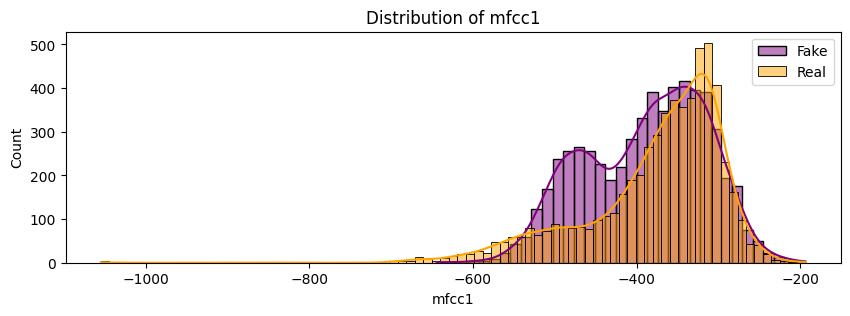

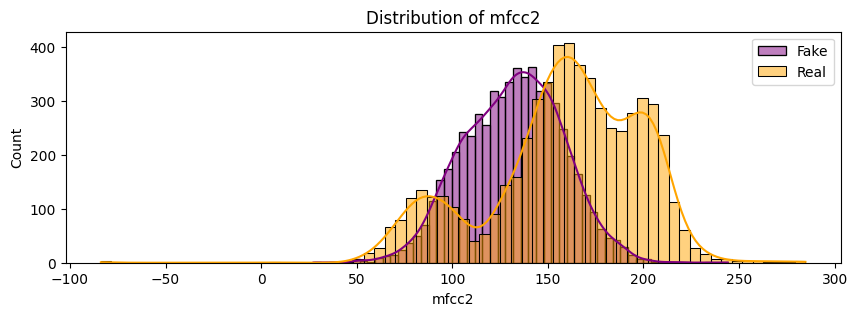

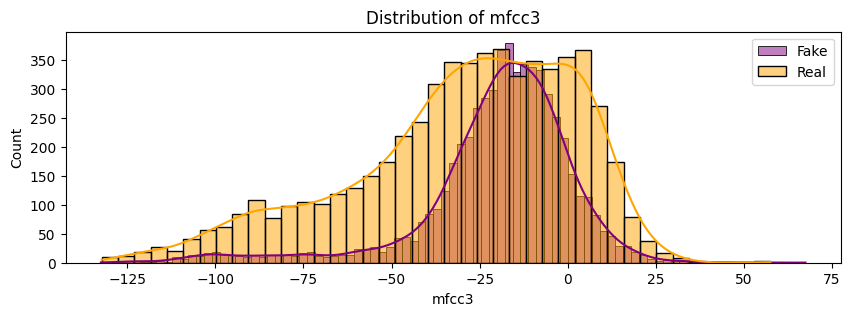

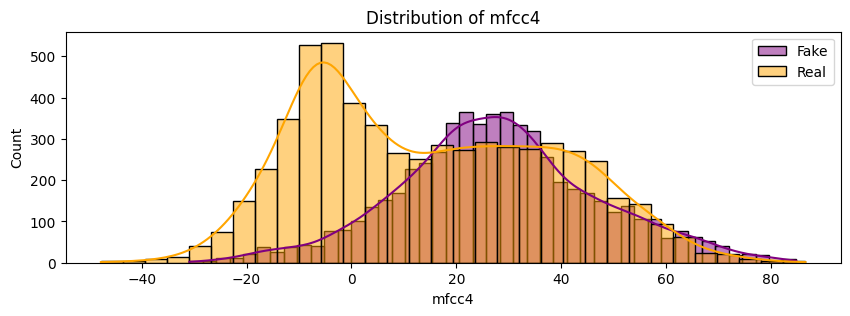

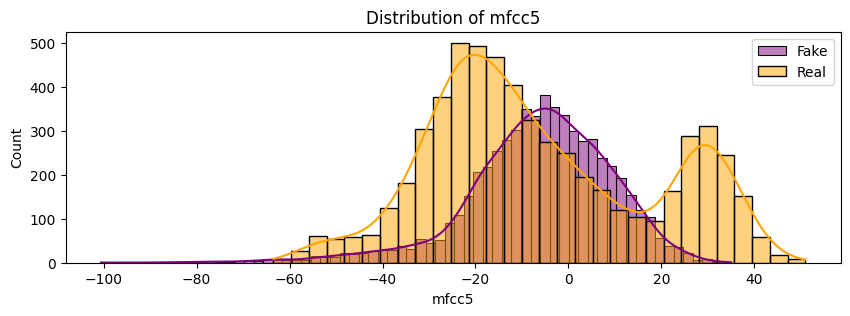

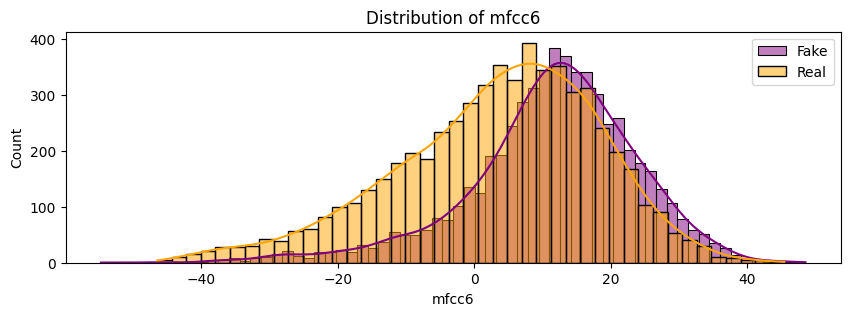

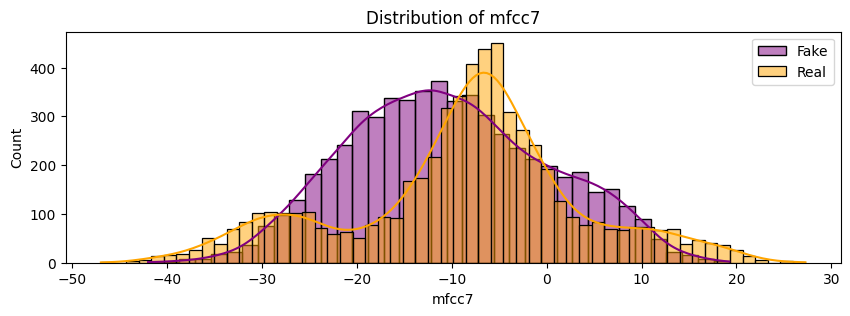

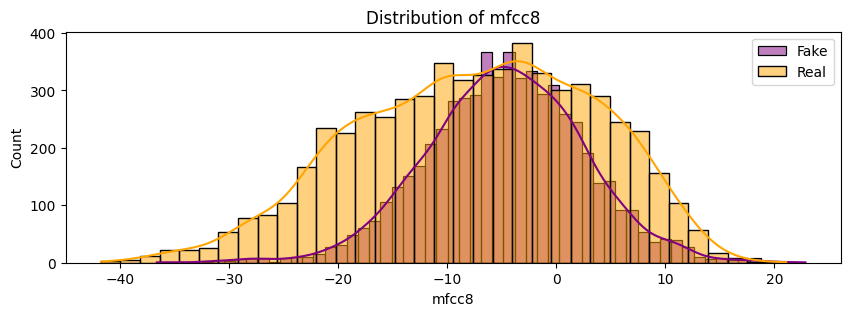

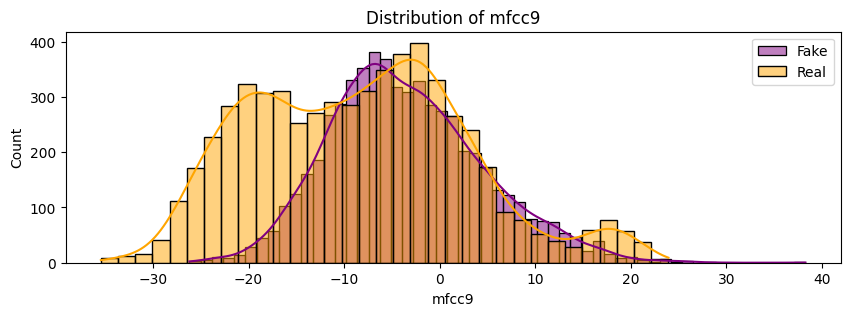

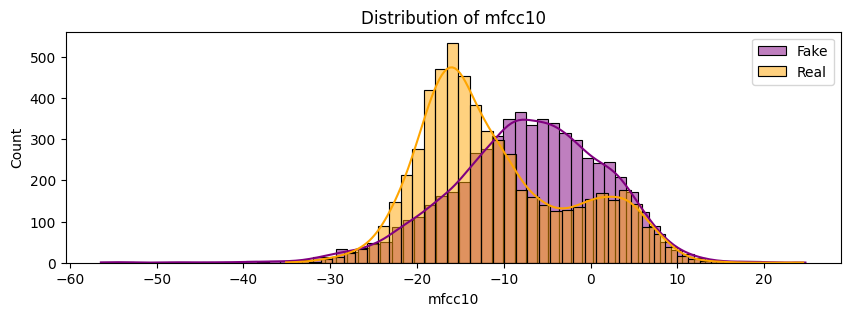

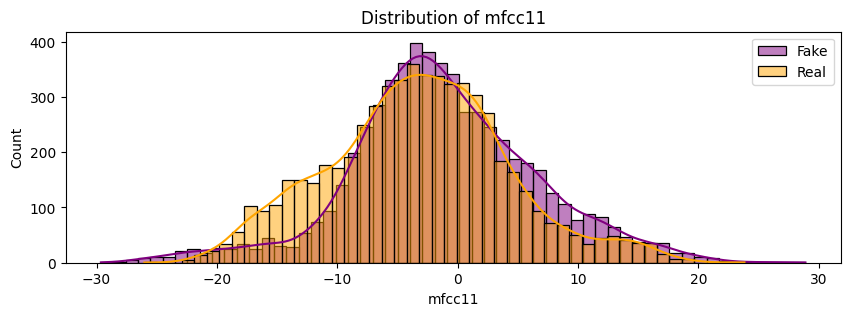

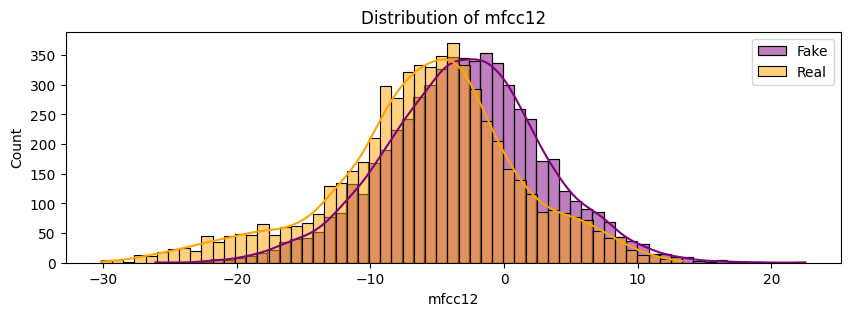

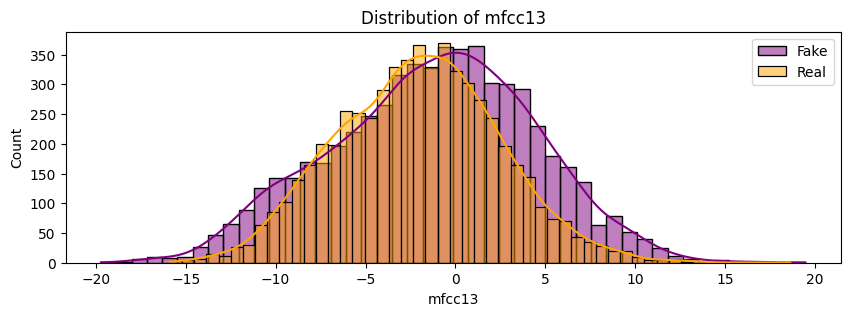

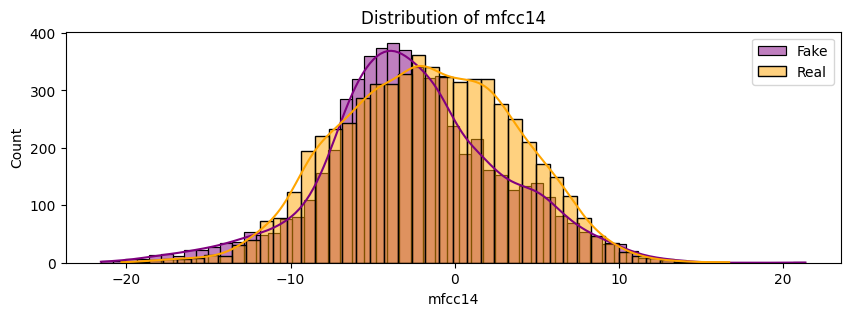

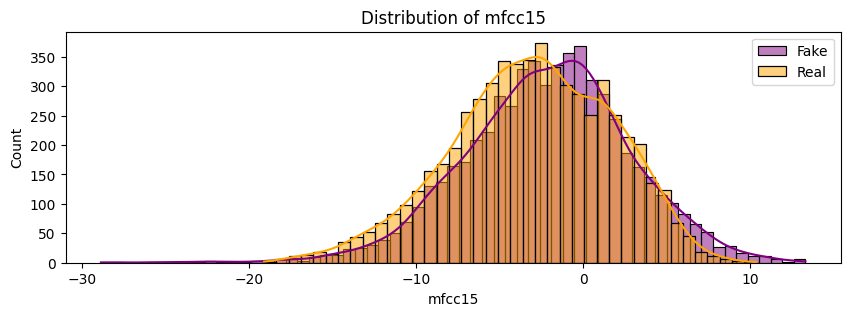

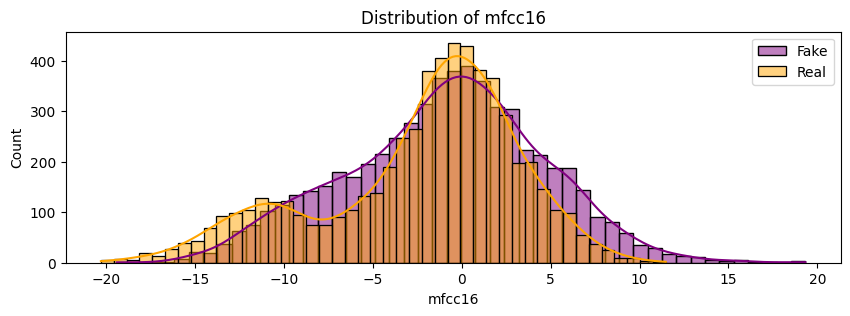

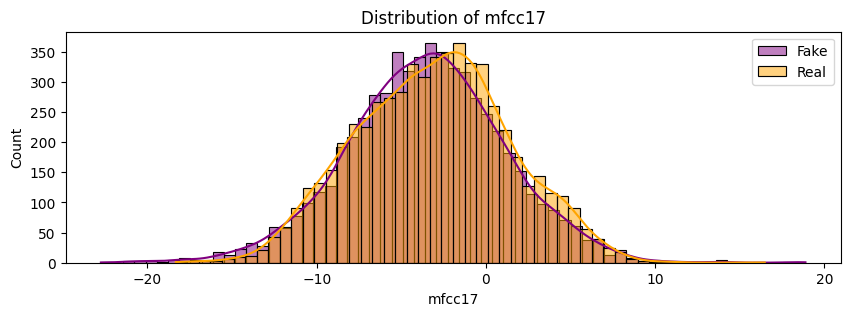

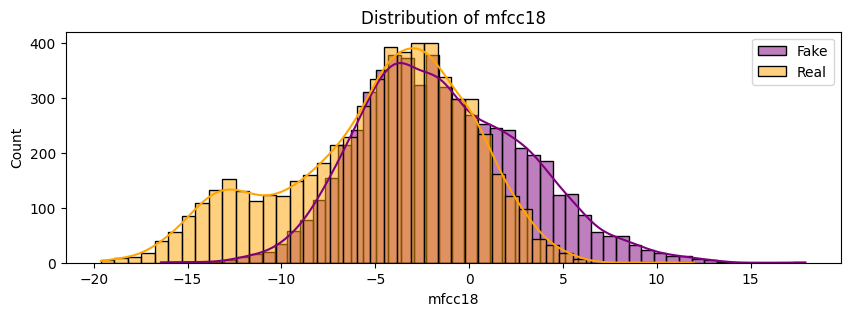

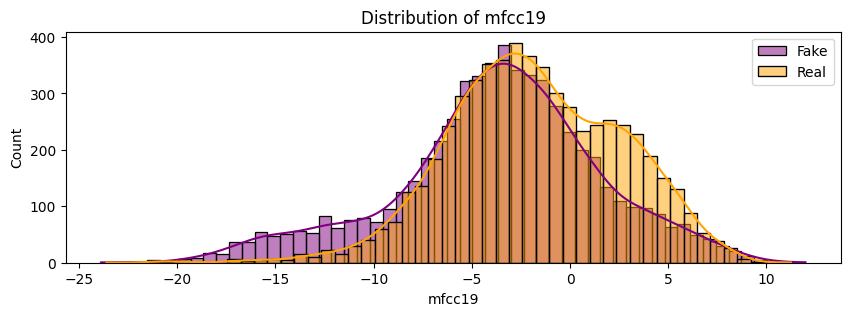

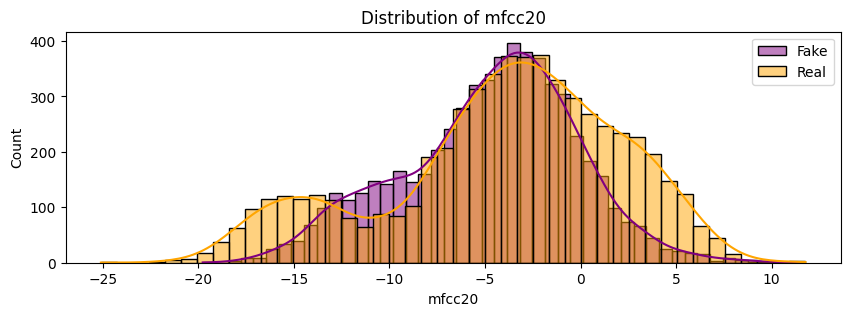

In [57]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
for column in X:
    plt.figure(figsize=(10, 3))
    sns.histplot(audio_df[audio_df['LABEL'] == 0][column], kde=True, label='Fake', color='purple')
    sns.histplot(audio_df[audio_df['LABEL'] == 1][column], kde=True, label='Real', color='orange')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

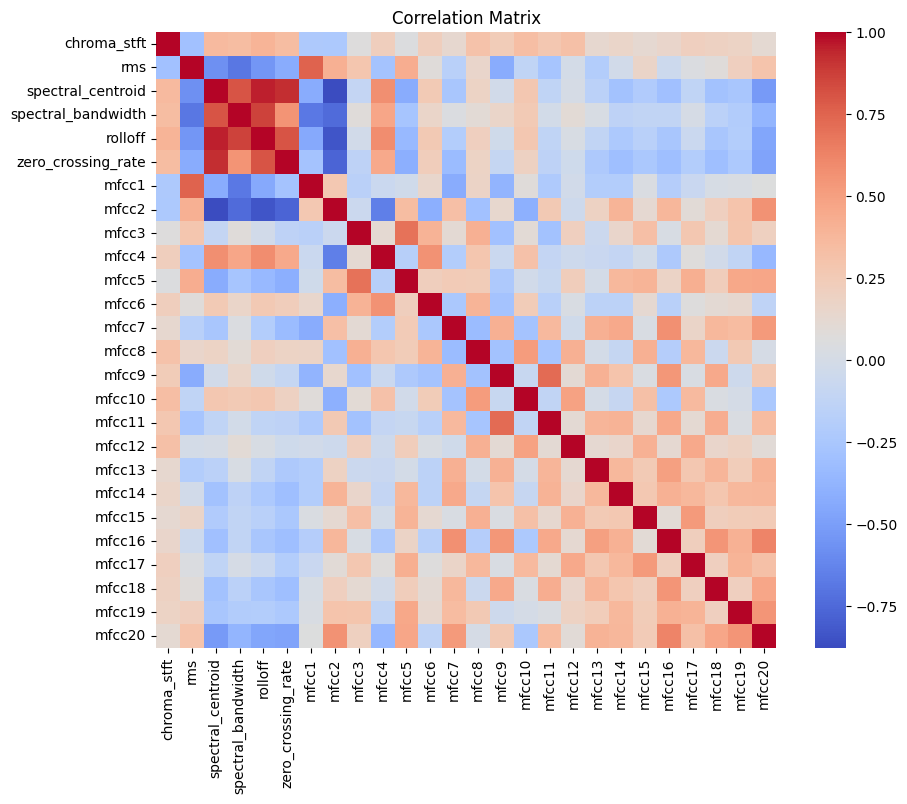

In [42]:
import seaborn as sns

correlation_matrix = audio_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# lstm

In [58]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True ,random_state=42)

In [59]:
X_reshaped = np.zeros((X_train.shape[0], 17, 10))

for i in range(17):
    X_reshaped[:, i, :] = X_train[:, i:i + 10]

y_reshaped = np.reshape(y_train, (y_train.shape[0], 1))

X_train = X_reshaped
y_train = y_reshaped

In [60]:
X_test_reshaped = np.zeros((X_test.shape[0], 17, 10))

for i in range(17):
    X_test_reshaped[:, i, :] = X_test[:, i:i + 10]

y_test_reshaped = np.reshape(y_test, (y_test.shape[0], 1))

X_test = X_test_reshaped
y_test = y_test_reshaped

In [61]:
print(X_train.shape)
print(y_train.shape)


(9422, 17, 10)
(9422, 1)


In [62]:
model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss = BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

C:\Users\Prince Boy\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 17, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,497 (228.50 KB)

 Trainable params: 58,497 (228.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9990 - loss: 0.0045
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9985 - loss: 0.0047
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9972 - loss: 0.0094
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9982 - loss: 0.0062
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9991 - loss: 0.0043
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9970 - loss: 0.0083
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9981 - loss: 0.0077
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9990 - loss: 0.0043
Epoch 9/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9993 - loss: 0.0030
Epoch 10/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9994 - loss: 0.0037
Epoch 11/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9967 - loss: 0.0108
Epoch 12/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 

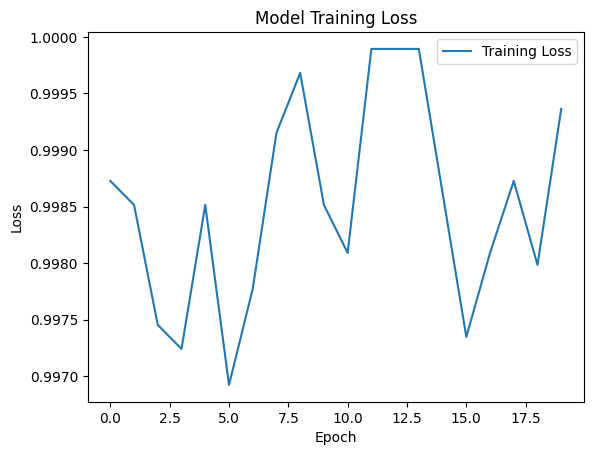

In [66]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20)

plt.plot(history.history['accuracy'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss'])
plt.show()

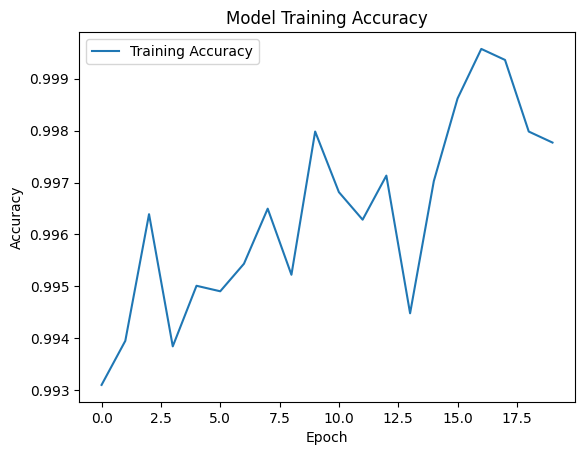

In [65]:
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

In [67]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9887 - loss: 0.0516
Test Loss: 0.05280065909028053
Test Accuracy: 0.9876909852027893


In [93]:
!pip install pydot


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
!brew install graphviz


'brew' is not recognized as an internal or external command,
operable program or batch file.


In [94]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='lstm_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [75]:
!pip install pydot
!pip install graphviz


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 338.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pydot


In [80]:
!pip install librosa

   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/253.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/253.7 kB 393.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/253.7 kB 655.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/253.7 kB 656.4 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/253.7 kB 841.6 kB/s eta 0:00:01
   ------------------------------------ - 245.8/253.7 kB 888.8 kB/s eta 0:00:01
   -------------------------------------- 253.7/253.7 kB 866.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/75.2 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 75.2/75.2 kB 698.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.6 MB 2.8 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 434.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.3 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 624.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    LSTM,
    Bidirectional,
    Dropout,
    BatchNormalization,
    Dense,
    MaxPooling1D,
    concatenate,
    GlobalAveragePooling1D,
    Flatten,
)
from sklearn.metrics import confusion_matrix
from keras.models import save_model, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [84]:
X_train,X_Test,Y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape[1]


26

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)

X_train_std = X_train_std.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
X_test_std = X_test_std.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))

In [86]:
def WIRENetSpoofImprovedEnhanced(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)  # Increased dropout rate for regularization

    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)

    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)

    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


input_shape = (X_train_std.shape[1], 1)


def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 10 == 0:
        return lr * 0.1
    return lr


model = WIRENetSpoofImprovedEnhanced(input_shape)

model.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    X_train_std,
    Y_train,
    epochs=20,
    batch_size=32)

Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4785 - loss: 4.3899
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5206 - loss: 4.3025
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5466 - loss: 4.2315
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5691 - loss: 4.1893
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5948 - loss: 4.1375
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6154 - loss: 4.0872
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6344 - loss: 4.0574
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6355 - loss: 4.0437
Epoch 9/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6669 - loss: 3.9907
Epoch 10/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6656 - loss: 3.9821
Epoch 11/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6867 - loss: 3.9327
Epoch 12/20
295/295 ━━━━━━━━━━━━━━━━━━━━

In [87]:
test_loss, test_acc = model.evaluate(X_test_std, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8560 - loss: 3.5646
Test Loss: 3.5561320781707764
Test Accuracy: 0.8595076203346252


In [95]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='wirenet_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
